<a href="https://colab.research.google.com/github/KevinSolano22/T.F_Audio/blob/main/(Kevin_Solano)Ejercicios_TF_SAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Solucion Ejercicio 1: Presente y describa el modelo que utiliza la FFT para el calculo de los armonicos.**

La Transformada de Fourier Rápida (FFT, por sus siglas en inglés) es un algoritmo utilizado para calcular los componentes armónicos de una señal en el dominio de la frecuencia. Permite descomponer una señal en sus componentes fundamentales (armónicos) que la componen. Aquí tienes una descripción general del proceso que utiliza la FFT para calcular estos armónicos:

Muestreo de la señal: El primer paso en el cálculo de los armónicos es muestrear la señal en el dominio del tiempo. Esto implica tomar una serie de puntos de la señal a intervalos regulares de tiempo. Cuanto mayor sea la densidad de muestreo, mejor será la precisión de la FFT en la representación de los componentes armónicos.

Ventaneo de la señal: Antes de aplicar la FFT, a menudo se aplica una función de ventana a la señal muestreada. Esta función de ventana atenúa los valores de la señal en los bordes, lo que ayuda a reducir el efecto de "fugas" o artefactos en el espectro de frecuencia resultante.

Transformada de Fourier Discreta: La FFT es esencialmente una implementación eficiente de la Transformada de Fourier Discreta (DFT). La DFT toma la señal muestreada y la transforma del dominio del tiempo al dominio de la frecuencia. Calcula la contribución de cada frecuencia a la señal original.

Espectro de frecuencia: El resultado de la FFT es un espectro de frecuencia que muestra la magnitud y la fase de las componentes armónicas presentes en la señal. La magnitud representa la amplitud de cada componente armónica, y la fase indica la relación de fase entre las componentes.

Armónicos: A partir del espectro de frecuencia, puedes identificar las frecuencias de los armónicos y sus respectivas amplitudes. Los armónicos son múltiplos enteros de la frecuencia fundamental de la señal, y su amplitud indica cuánta energía contribuye cada armónico a la señal en cuestión.

Post-procesamiento: Una vez que tienes información sobre los armónicos, puedes utilizarla para analizar y sintetizar la señal de diferentes maneras, como filtrar ciertas frecuencias, reconstruir la señal original o realizar análisis específicos según tus necesidades.

En resumen, la FFT es una técnica eficiente y ampliamente utilizada para calcular los armónicos de una señal, lo que permite analizar su contenido en el dominio de la frecuencia. Es fundamental en una variedad de aplicaciones, como procesamiento de señales, análisis espectral, compresión de datos, y en campos como la música, la ingeniería y la física.






----------------------------------------------




**Solucion Ejercicio 2: Realice una comparación del tiempo de cómputo requerido para el cálculo de la transformada discreta de Fourier utilizado la estimación por sumatoria vs la FFT. Pruebe distintos valores de longitud de la señal de entrada (4,8,16,32,64,128,256,512,1024,2048,4096). Presente una gráfica comparativa de los tiempos de ejecución en segundos vs la longitud de la señal de entrada.**

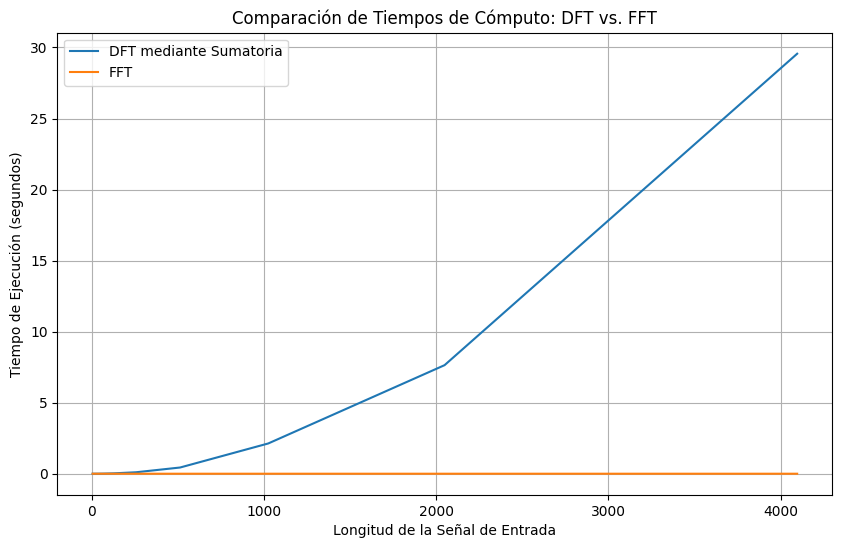

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Función para calcular DFT mediante sumatoria
def dft_summation(signal):
    N = len(signal)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        X[k] = sum(signal[n] * np.exp(-2j * np.pi * k * n / N) for n in range(N))
    return X

# Prueba de tiempos para diferentes longitudes de señal
signal_lengths = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
dft_times = []
fft_times = []

for length in signal_lengths:
    signal = np.random.random(length)  # Señal aleatoria

    # Medición del tiempo para DFT mediante sumatoria
    start_time = time.time()
    dft_summation(signal)
    end_time = time.time()
    dft_time = end_time - start_time
    dft_times.append(dft_time)

    # Medición del tiempo para FFT
    start_time = time.time()
    np.fft.fft(signal)
    end_time = time.time()
    fft_time = end_time - start_time
    fft_times.append(fft_time)

# Gráfica comparativa de los tiempos de ejecución
plt.figure(figsize=(10, 6))
plt.plot(signal_lengths, dft_times, label="DFT mediante Sumatoria")
plt.plot(signal_lengths, fft_times, label="FFT")
plt.xlabel("Longitud de la Señal de Entrada")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.legend()
plt.title("Comparación de Tiempos de Cómputo: DFT vs. FFT")
plt.grid()
plt.show()



 **Solucion Ejercicio 3: Implemente un filtro pasa bajas, un pasa altas, un pasa bandas, y un rechaza bandas utilizando la FFT y la iFFT sobre 5 segundos de su canción favorita de YouTube.**

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-11.0.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (129 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (138 kB)
  Using cached idna-3.4-py3-none

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


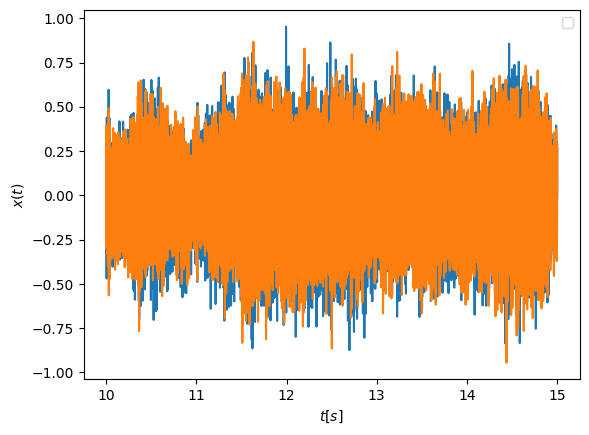

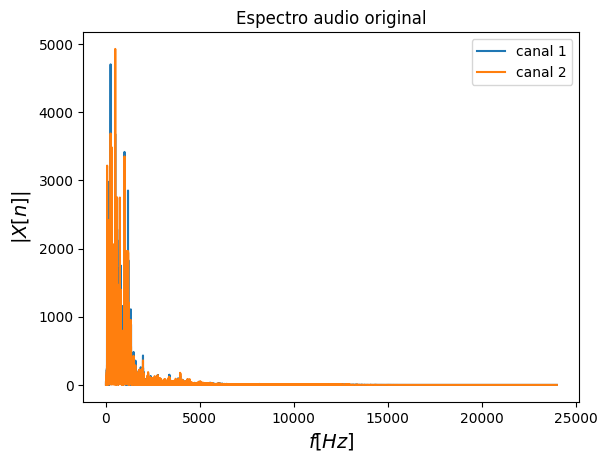

In [12]:
#aquí procedemos a reutilizar el código suministrado por el profesor.
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
link="https://www.youtube.com/watch?v=PWqEPKduGm8"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}
!ffmpeg -y -i audio.mp3 output.wav
!pip install soundfile
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))
xpro = x.copy() #copiar archivos para procesar
ti = 10 #tiempo incio a procesar seg
tf = 15 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),:]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs)
plt.legend(('canal 1','canal 2'))
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

Xw = np.fft.rfft(xs,axis=0) # axis=0 permite aplicar fft por cada columna de xpro
#Xwc1 = np.fft.rfft(xs[:,0])
#Xwc2 = np.fft.rfft(xs[:,1])
vf = np.fft.rfftfreq(np.size(xs,0),1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Xw))#se grafica la magnitud
plt.legend(('canal 1','canal 2'))
plt.title(r'Espectro audio original')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.show()


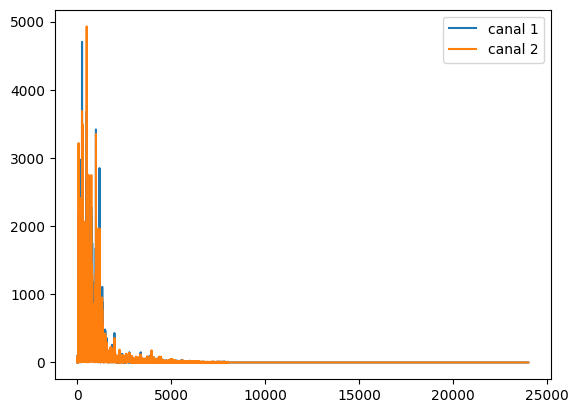

In [13]:
#filtrar espectro con pasa bajas

Xwf = Xw.copy()
f1 = 0 #frecuencia en Hz corte 1
f2 = 8000 #frecuencia en Hz corte 2
#los cortes anteriores sabiendo que trabajamos con uan frecuencia que se puede ver de entre 0 a 24000
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

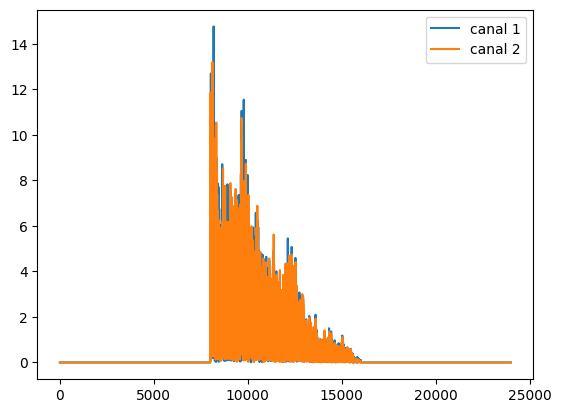

In [14]:
#filtro pasa medias
Xwf = Xw.copy()
f1 = 8000 #frecuencia en Hz corte 1
f2 = 16000 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

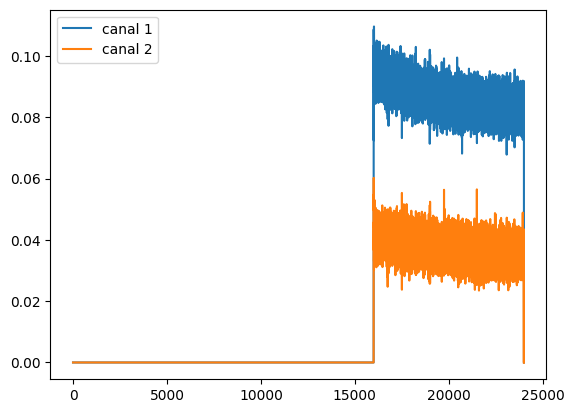

In [15]:
#filtro pasa altas
Xwf = Xw.copy()
f1 = 16000 #frecuencia en Hz corte 1
f2 = 24000 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

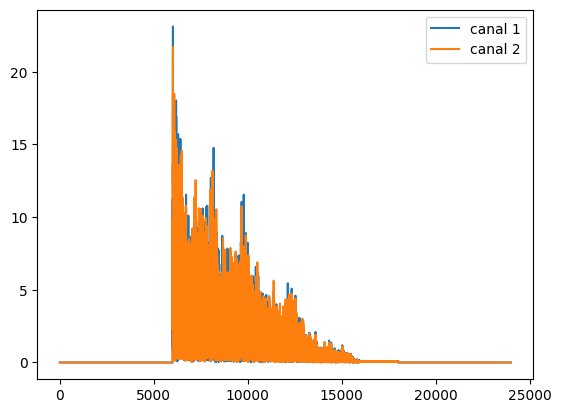

In [16]:
#filtro rechaza bandas bandas
Xwf = Xw.copy()
f1 = 6000 #frecuencia en Hz corte 1
f2 = 18000 #frecuencia en Hz corte 2
ind = ~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

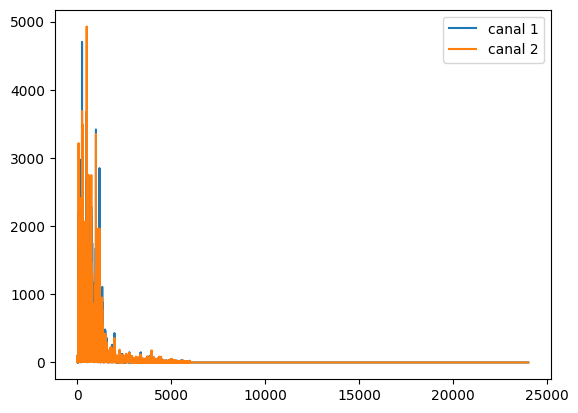

In [17]:
#filtro pasa bandas
Xwf = Xw.copy()
f1 = 6000 #frecuencia en Hz corte 1
f2 = 18000 #frecuencia en Hz corte 2
ind = ((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xwf[ind,:] = 0
plt.plot(vf,abs(Xwf))
plt.legend(('canal 1','canal 2'))
plt.show()

**Solucion Ejercicio 4: Diseñe e implemente un detector de género musical, que permita diferenciar entre tres tipos de género. Para ello, construya una base de datos con al menos 30 registros por género musical, de 5 segundos cada uno, y luego implemente un código que permita recibir un nuevo registro músical de 5 segundos para detectar el género de la canción a partir de la distancia Euclídea entre la magnitud del espectro de Fourier del nuevo registro, y las magnitudes de los espectros de la base de datos construida (Ver Cuaderno YouTube Download/Detector).**

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1O9VyjV2jcx2Ex3uw11t94vO390joY35F"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,Link,Genero,Cantante,Tipo
0,https://www.youtube.com/watch?v=B6qaDNojRMw,Trap,Jay Wheeler,1
1,https://www.youtube.com/watch?v=_REASiFeT_g,Trap,Eladio Carrión ft. Myke Towers,1
2,https://www.youtube.com/watch?v=FXO40R1_wgc,Trap,Blessd,1
3,https://www.youtube.com/watch?v=yDhxCiLXEHs,Trap,Eladio Carrion,1
4,https://www.youtube.com/watch?v=rAr3-Pn9yRI,Trap,Arcangel,1
5,https://www.youtube.com/watch?v=s5cYXknsDbY,Trap,"Eladio Carrion, Bizarrap",1
6,https://www.youtube.com/watch?v=ymvYySd_P2E,Trap,Duki,1
7,https://www.youtube.com/watch?v=PGJ43zaam_0,Trap,Bad bunny,1
8,https://www.youtube.com/watch?v=Q0obZUZBVdM,Trap,Blessd,1
9,https://www.youtube.com/watch?v=gNWDqZ4vi3w,Trap,Blessd,1


In [10]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-11.0.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (129 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (138 kB)
  Using cached idna-3.4-py3-none

In [11]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('resultados')
except:
  print("Carpeta resultados ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"Link: {X.loc[n,'Link']}\n")
    print(f"Cantante: {X.loc[n,'Cantante']}\n")
    print(f"Genero: {X.loc[n,'Genero']}\n")
    #ruta video n-th
    name_ = 'resultados/'+X.loc[n,'Cantante']+"_"+str(n)+"_"+str(X.loc[n,'Tipo']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'Link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 20


KeyError: ignored

In [ ]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'resultados/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

In [ ]:
!pip install soundfile #instalar sondfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

In [ ]:
from IPython.display import Audio #reproducir segmento
i = 10
Audio(x_t[i].T,rate=fs)

#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

In [ ]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

In [ ]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [ ]:
#reproducir audio
i = 96
Audio(x_t[i].T,rate=fs)

i = 14
Audio(x_t[i].T,rate=fs)